<a href="https://colab.research.google.com/github/BalramAgnihotri123/Machine-Learning-And-Deep-Learning-HandsOn/blob/main/03_Pytorch_MultiClassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Importing relevent liabraries

In [2]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 419 kB 6.3 MB/s 


In [3]:
import torch 
import torchmetrics
from torch import nn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [4]:
# Writing device agnostic code 
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## 2.Getting data and converting to tensors

In [5]:
## setting up hyper Parameters
RANDOM_STATE = 42
FEATURES = 2
N_SAMPLES = 1000
CLUSTER_STD = 1.5
CENTERS =4

x_blobs, y_blobs = make_blobs(n_samples=N_SAMPLES,n_features=FEATURES,random_state =RANDOM_STATE,cluster_std=CLUSTER_STD,centers=CENTERS)

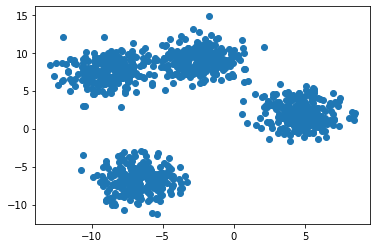

In [6]:
plt.scatter(x_blobs[:,0],x_blobs[:,1])

In [7]:
X_train,X_test,y_train,y_test = train_test_split(x_blobs,y_blobs,random_state =42,test_size =0.2)
X_train,X_test,y_train,y_test = torch.tensor(X_train),torch.tensor(X_test),torch.tensor(y_train),torch.tensor(y_test)

In [8]:
X_train,X_test,y_train,y_test  = X_train.type(torch.float),X_test.type(torch.float),y_train.type(torch.float),y_test.type(torch.float) 

In [9]:
X_train.dtype

torch.float32

## 3.Creating a class that subclasses `nn.Module`

In [10]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

class multi_class_classification(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
        nn.Linear(2,10),
        nn.ReLU(),
        nn.Linear(10,10),
        nn.ReLU(),
        nn.Linear(10,4)
    )
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.layers(x)
model_0 = multi_class_classification().to(device)

In [11]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

### 3.1 Creating a training loop for our multi class model

In [12]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),lr = 0.01)

epochs = 1000

for epoch in range(epochs):
  model_0.train()
  y_logits = model_0(X_train).squeeze()
  y_preds = torch.argmax(torch.softmax(y_logits,dim = 1),dim = 1)
  loss = loss_fn(y_logits,y_train.type(torch.long))
  train_acc = torchmetrics.functional.accuracy(y_preds.type(torch.int),y_train.type(torch.int))
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    y_logit = model_0(X_test).squeeze()
    predictions = torch.argmax(torch.softmax(y_logit,dim = 1),dim =1)
    test_acc = torchmetrics.functional.accuracy(y_logit,y_test.type(torch.int))
    if epoch % 100 ==0:
      print(f"epoch: {epoch} \n train_accuracy: {train_acc}\n test_accuracy: {test_acc}")

epoch: 0 
 train_accuracy: 0.027499999850988388
 test_accuracy: 0.03500000014901161
epoch: 100 
 train_accuracy: 0.5137500166893005
 test_accuracy: 0.4449999928474426
epoch: 200 
 train_accuracy: 0.9574999809265137
 test_accuracy: 0.9399999976158142
epoch: 300 
 train_accuracy: 0.9912499785423279
 test_accuracy: 0.9900000095367432
epoch: 400 
 train_accuracy: 0.9900000095367432
 test_accuracy: 0.9950000047683716
epoch: 500 
 train_accuracy: 0.9900000095367432
 test_accuracy: 0.9950000047683716
epoch: 600 
 train_accuracy: 0.9900000095367432
 test_accuracy: 0.9950000047683716
epoch: 700 
 train_accuracy: 0.9900000095367432
 test_accuracy: 0.9950000047683716
epoch: 800 
 train_accuracy: 0.9900000095367432
 test_accuracy: 0.9950000047683716
epoch: 900 
 train_accuracy: 0.9900000095367432
 test_accuracy: 0.9950000047683716


In [13]:
from pathlib import Path
import requests
if Path('helper_functions.py').is_file():
  print('file exists')
else:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open('helper_functions.py','wb') as f:
    f.write(request.content)

## 4.Visualizing our model to see the training effect on the test data.

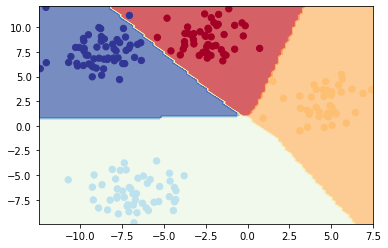

In [14]:
from helper_functions import plot_decision_boundary
plot_decision_boundary(model_0,X_test,y_test)

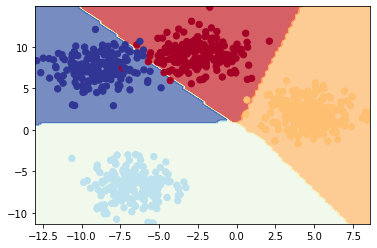

In [15]:
plot_decision_boundary(model_0,X_train,y_train)